In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.clean import Clean


immo_df = pd.read_csv('../data/cleaned/appended_data.csv')

immo_df = Clean().exclude_outliers(immo_df)

map = {
    'TO_RESTORE': 1, 0
    'TO_RENOVATE': 2,
    'TO_BE_DONE_UP': 3,
    'GOOD': 4,
    'JUST_RENOVATED': 5,
    'AS_NEW': 6
}
immo_df['State of Building'] = immo_df['State of Building'].apply(lambda x: map.get(x, np.NAN))

energy_ratings = {
    "G": 8,
    "F": 7,
    "E": 6,
    "D": 5,
    "C": 4,
    "B": 3,
    "A": 2,
    "A+": 1,
    "A++": 0
}
immo_df['EPC'] = immo_df['EPC'].apply(lambda x: energy_ratings.get(x, np.NAN))
kitchen_types={
    "NOT_INSTALLED": 0,
    "USA_UNINSTALLED": 0,
    "SEMI_EQUIPPED": 1,
    "USA_SEMI_EQUIPPED": 1,
    "INSTALLED": 2,
    "USA_INSTALLED": 2,
    "HYPER_EQUIPPED": 3,
    "USA_HYPER_EQUIPPED": 3,
}
immo_df['Kitchen Type'] = immo_df['Kitchen Type'].apply(lambda x: kitchen_types.get(x, np.NAN))

# prevent print of data frame trunking
pd.set_option('display.max_columns', None)
subset = immo_df.loc[:,['EPC', 'State of Building', 'Kitchen Type']]

common_columns = ['Price', 'Room Count', 'Habitable Surface', 'Build Year', "Kitchen Type", 'EPC', 'Consumption Per m2','State of Building', "Kitchen Surface"]
house_only_columns = ["Facades", 'Land Surface', ]
appartment_only_columns = ["Terrace Surface", ]
house_columns = common_columns + house_only_columns
appartment_columns = common_columns + appartment_only_columns

dropping fireplace count column


# HOUSES

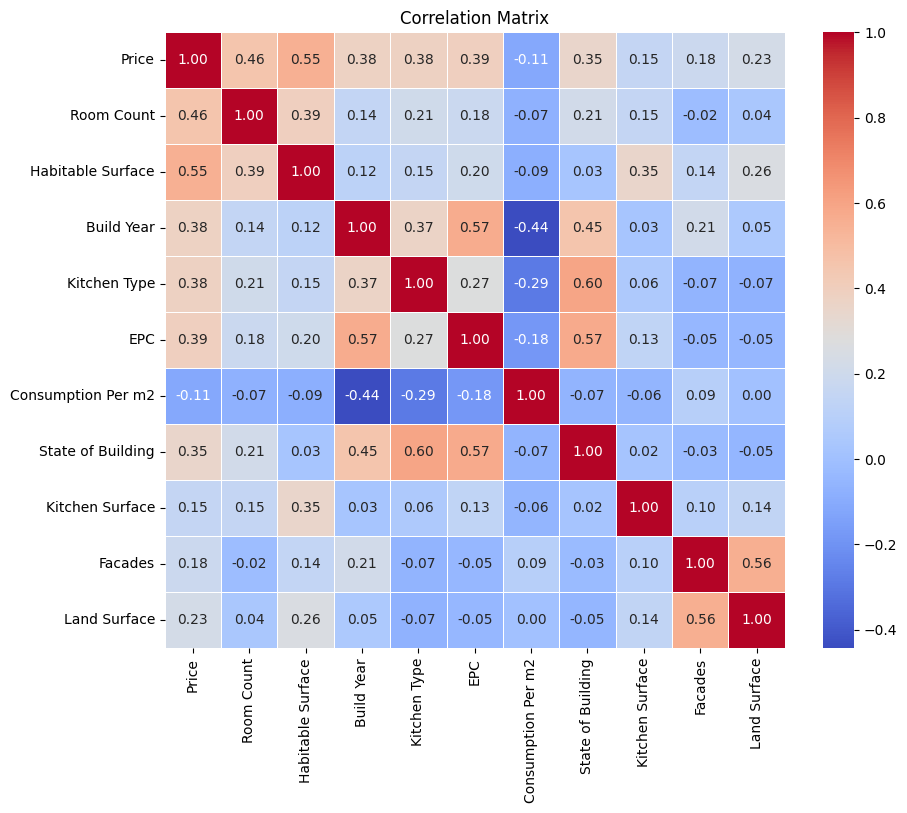

In [42]:
houses = immo_df[immo_df['Type'] == 'HOUSE']

corr_matrix = houses[house_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

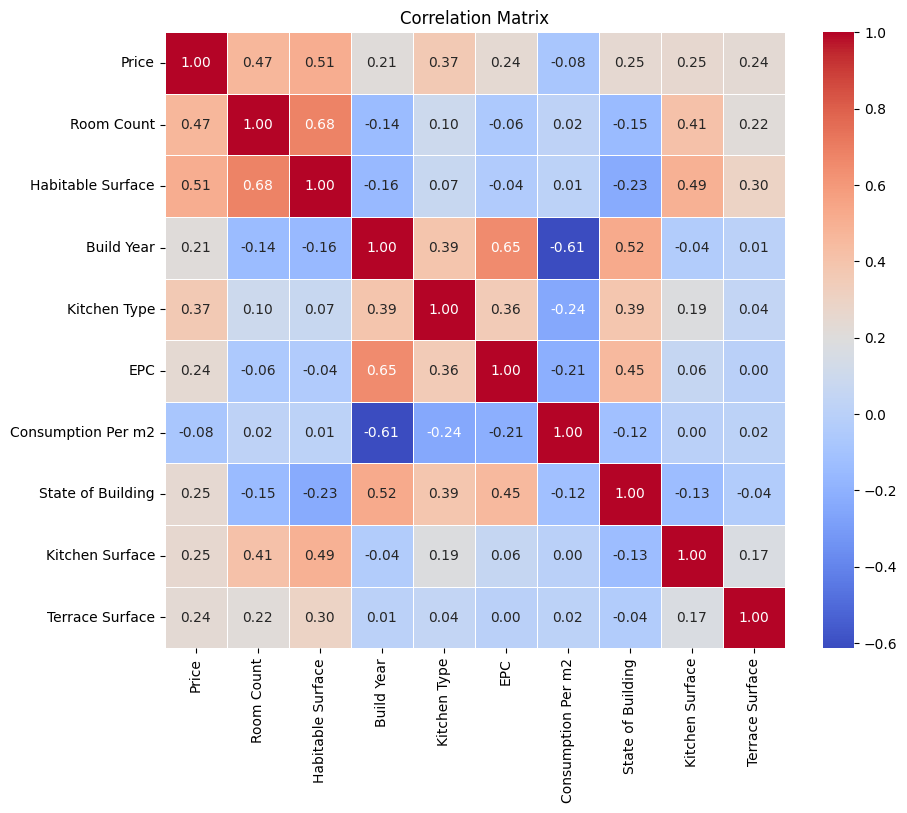

In [43]:
appartments = immo_df[immo_df['Type'] == 'APARTMENT']

corr_matrix = immo_df[appartment_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [44]:
# total houses
houses.shape

(3229, 43)

In [45]:
# missing values of house_columns
houses[house_columns].isna().sum()

Price                    0
Room Count              32
Habitable Surface      185
Build Year             880
Kitchen Type           834
EPC                    720
Consumption Per m2     842
State of Building      965
Kitchen Surface       1850
Facades                440
Land Surface             0
dtype: int64

In [46]:
# total appartments
appartments.shape

(7926, 43)

In [47]:
# missing values of appartment_columns
appartments[appartment_columns].isna().sum()

Price                    0
Room Count              25
Habitable Surface      117
Build Year            1958
Kitchen Type          1621
EPC                   3122
Consumption Per m2    3281
State of Building     2998
Kitchen Surface       5761
Terrace Surface       1625
dtype: int64

# HOUSES - habitable surface - price

0.5506652596022891
2194.510326277434


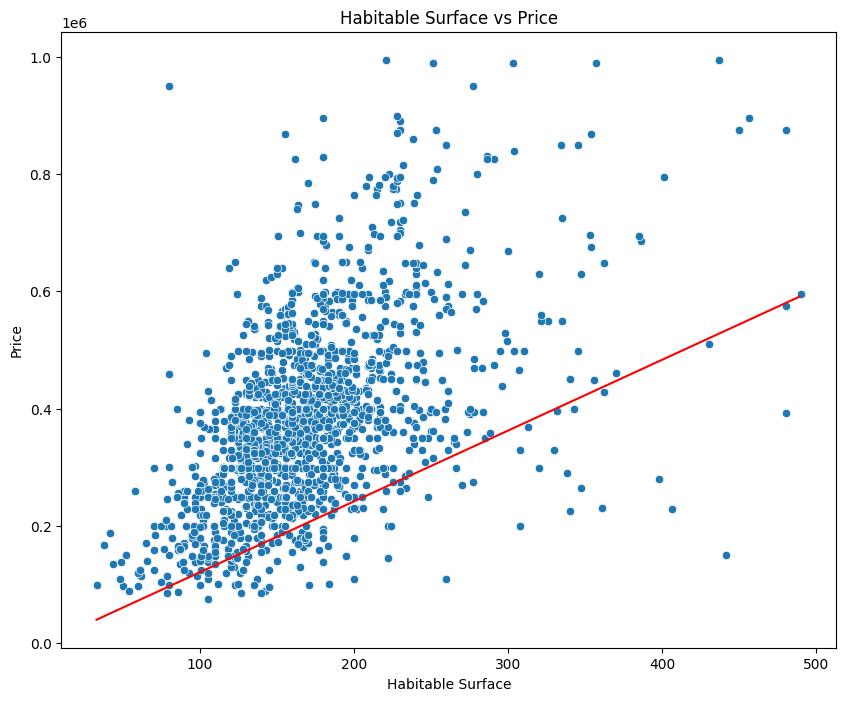

In [48]:
# plot scatter plot habbitable surface vs price also calculate the correlation
plt.figure(figsize=(10, 8))
sns.scatterplot(data=houses, x='Habitable Surface', y='Price')
# calculate the correlation coefficient
correlation = houses['Habitable Surface'].corr(houses['Price'])
print(correlation)
min = int(houses['Habitable Surface'].min())
max = int(houses['Habitable Surface'].max())
# claculate the offset

# plot the line of best fit
factor = houses['Price'].mean() / houses['Habitable Surface'].mean()
print(factor)
plt.plot(range(min, max), [correlation * x * factor for x in range(min, max)], color='red')
# plot a 45 degree line

plt.title('Habitable Surface vs Price')
plt.show()
